In [1]:
import datetime as dt  
import numpy as np
from netCDF4 import Dataset 
import matplotlib.pyplot as plt
import gdal
from VPRMout_fun import Read_VPRMout

VPRMoutDir = '/data0/dwei/VPRMout/'
OutDir  = '/data0/dwei/VPRMout/Dryad/'   # output dir
filepath_grs = VPRMoutDir+'GRS_June_20220322.nc'    
filepath_dbf = VPRMoutDir+'DBF_June_20220322.nc' 
filepath_isa = VPRMoutDir+'ISA_June_20220322.nc' 

Domname = 'DEVasDBF'                               # changes as desired
GEE_month, Resh_month, Resa_month, NEE_month, time_month, Xdim_month,\
Ydim_month, TMP_month = Read_VPRMout(filepath_dbf) # changes as desired

# The dates in VPRM in datetime.date() format
Dates_vprm = np.array([dt.datetime.fromtimestamp(t).date() for t in time_month])

# Set water to nan 
DataDir = '/data0/dwei/VPRMdata/'  # input dir
ds_nlcd = gdal.Open(DataDir+'nlcd_epsg32618_cropped.tif')
NLCD_2D = ds_nlcd.GetRasterBand(1).ReadAsArray()  
NLCD_2D[NLCD_2D==0] = 11  # NLCD has zeros in the southeast corner
water_boo = NLCD_2D==11

GEE_month[:, water_boo] = np.nan
Resh_month[:, water_boo] = np.nan
Resa_month[:, water_boo] = np.nan

# Set up nc file directory and names
start = dt.datetime.strptime("20210601", "%Y%m%d")
end = dt.datetime.strptime("20210701", "%Y%m%d")
Dates = [start + dt.timedelta(days=x) for x in range(0, (end-start).days)] # datetime
Dates_obj = np.array([d.date() for d in Dates]) # date

outfiles = []
for d in Dates:
    str_date=d.strftime("%Y%m%d")
    outfiles.append(OutDir+Domname+'_'+str_date+'.nc')
print(outfiles[0])

try: ncfile.close()  # just to be safe, make sure dataset is not already open.
except: pass


KeyboardInterrupt: 

In [160]:
# Loop through daily ncfile to write data
for dim in range(0,30):   
    
    # Creating a new Dataset
    ncfile = Dataset(outfiles[dim], mode='w', format='NETCDF4') 
    # Dimensions
    X_dim = ncfile.createDimension('Xdim', np.shape(NLCD_2D)[1])  # cols, equivalent to lon 
    Y_dim = ncfile.createDimension('Ydim', np.shape(NLCD_2D)[0])  # rows, equivalent to lat
    time_dim = ncfile.createDimension('time', 24)                  # hourly daily 

    # Variables
    X = ncfile.createVariable('Xdim', np.float32, ('Xdim',))
    X.units = 'meter'
    X.long_name = 'Projected meters east-west in EPSG32618'
    
    Y = ncfile.createVariable('Ydim', np.float32, ('Ydim',))
    Y.units = 'degree'
    Y.long_name = 'Projected meters north-south in EPSG32618'
    
    X[:] = Xdim_grs    # east-west   
    Y[:] = Ydim_grs    # north-south 

    time = ncfile.createVariable('time', np.float64, ('time',)) # VPRM are in eastern time
    time.units = 'seconds since 00:00:00 ET on 1 January 1970'
    time.long_name = 'seconds since 00:00:00 ET on 1 January 1970'

    # Define a 3D variable to hold the data
    GEE = ncfile.createVariable('GEE',np.float64,('time','Ydim','Xdim')) 
    GEE.units = '\u03BCmoles m-2 s-1'
    GEE.standard_name = 'Gross Ecosystem Exchange'

    RES_H = ncfile.createVariable('RESH',np.float64,('time','Ydim','Xdim')) 
    RES_H.units = '\u03BCmoles m-2 s-1'
    RES_H.standard_name = 'Heterotrophic respiration'

    RES_A = ncfile.createVariable('RESA',np.float64,('time','Ydim','Xdim')) 
    RES_A.units = '\u03BCmoles m-2 s-1'
    RES_A.standard_name = 'autotrophic respiration'

    print('------------- %s file created --------------' %outfiles[dim])
    
    # Save hourly data into variables created in nc file
    dt_day = np.array([Dates[dim]+dt.timedelta(hours=x) for x in range(0,24)])
    time[:] = np.array([dt.datetime.timestamp(d) for d in dt_day]) # timestampes

    time_boo=Dates_vprm==Dates_obj[dim]
    GEE[:,:,:] = GEE_month[time_boo,:,:] 
    RES_H[:,:,:] = Resh_month[time_boo,:,:]
    RES_A[:,:,:] = Resa_month[time_boo,:,:]

    # close the output nc file
    print('      time dimension  :' , np.shape(time))
    print('      GEE dimension   :' , np.shape(GEE))
    print('      Res_H dimension :' , np.shape(RES_H))
    print('      Res_A dimension :' , np.shape(RES_A))
    ncfile.close();
    print('------------- %s file closed --------------' %outfiles[dim])
          
    

------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210601.nc file created --------------
      time dimension  : (24,)
      GEE dimension   : (24, 1560, 1546)
      Res_H dimension : (24, 1560, 1546)
      Res_A dimension : (24, 1560, 1546)
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210601.nc file closed --------------
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210602.nc file created --------------
      time dimension  : (24,)
      GEE dimension   : (24, 1560, 1546)
      Res_H dimension : (24, 1560, 1546)
      Res_A dimension : (24, 1560, 1546)
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210602.nc file closed --------------
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210603.nc file created --------------
      time dimension  : (24,)
      GEE dimension   : (24, 1560, 1546)
      Res_H dimension : (24, 1560, 1546)
      Res_A dimension : (24, 1560, 1546)
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210603.nc file closed --------------
----------

      time dimension  : (24,)
      GEE dimension   : (24, 1560, 1546)
      Res_H dimension : (24, 1560, 1546)
      Res_A dimension : (24, 1560, 1546)
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210626.nc file closed --------------
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210627.nc file created --------------
      time dimension  : (24,)
      GEE dimension   : (24, 1560, 1546)
      Res_H dimension : (24, 1560, 1546)
      Res_A dimension : (24, 1560, 1546)
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210627.nc file closed --------------
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210628.nc file created --------------
      time dimension  : (24,)
      GEE dimension   : (24, 1560, 1546)
      Res_H dimension : (24, 1560, 1546)
      Res_A dimension : (24, 1560, 1546)
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210628.nc file closed --------------
------------- /data0/dwei/VPRMout/Dryad/DEVasDBF_20210629.nc file created --------------
      time

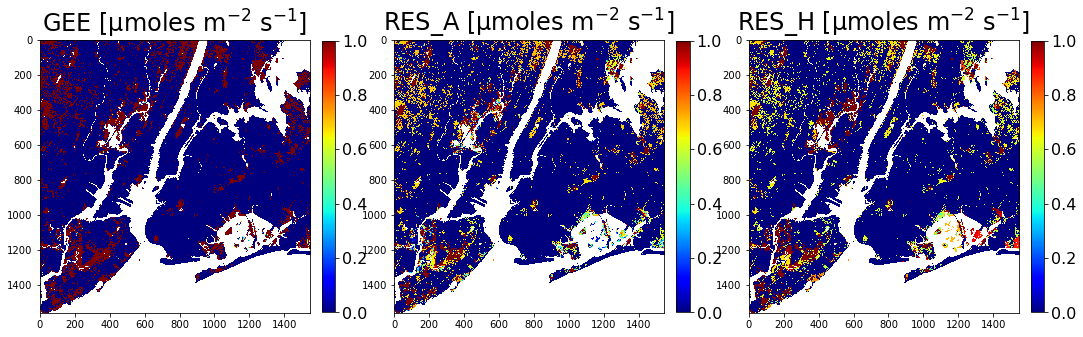

In [147]:
# A quick plot of hourly GEE and RES
plt.rcParams['axes.facecolor'] = 'w'

# Mask water surfaces  
hr = 12
masked_GEE_hr = np.ma.array(GEE[hr,:,:], mask=water_boo)
masked_RESA_hr = np.ma.array(RES_A[hr,:,:], mask=water_boo)
masked_RESH_hr = np.ma.array(RES_H[hr,:,:], mask=water_boo)

fig = plt.figure(figsize=(18,8)) #plt.subplots(2, 2, figsize=(15,6))
FontSize = 24
row = 1
col = 3

# GEE
ax = fig.add_subplot(row, col, 1)
im_gee = ax.imshow(-masked_GEE_hr.reshape(np.shape(NLCD_2D)),\
                   interpolation='none', vmin = 0, vmax = 1, cmap='jet')
ax.set_title('GEE [\u03BCmoles m$^{-2}$ s$^{-1}$]', fontsize = FontSize)
cbar = plt.colorbar(im_gee,ax=ax,fraction=0.046, pad=0.04) # magic numbers fraction and pad!
cbar.ax.tick_params(labelsize=FontSize-8)

# RES
ax = fig.add_subplot(row, col, 2)
ax.set_title('RES_A [\u03BCmoles m$^{-2}$ s$^{-1}$]', fontsize = FontSize)
im_rest = ax.imshow(masked_RESA_hr.reshape(np.shape(NLCD_2D)),\
                    interpolation='none', vmin = 0, vmax = 1, cmap='jet')
cbar=plt.colorbar(im_rest,ax=ax,fraction=0.046, pad=0.04) # magic numbers fraction and pad!
cbar.ax.tick_params(labelsize=FontSize-8)

# RES
ax = fig.add_subplot(row, col, 3)
ax.set_title('RES_H [\u03BCmoles m$^{-2}$ s$^{-1}$]', fontsize = FontSize)
im_rest = ax.imshow(masked_RESH_hr.reshape(np.shape(NLCD_2D)),\
                    interpolation='none', vmin = 0, vmax = 1, cmap='jet')
cbar=plt.colorbar(im_rest,ax=ax,fraction=0.046, pad=0.04) # magic numbers fraction and pad!
cbar.ax.tick_params(labelsize=FontSize-8)

